### Code for UMB Lift charts, QQ plot and Gini curve

In [ ]:
# Harsh 10/26/2023
# Code for UMB Lift charts, QQ plot and Gini curve
# Used for ascertaining the credibility of UMB_Tar model and determining its appropriate weight in the overall mix of 3 models
# Iterated for different weights for UMB_Tar - 20%, 30%

In [ ]:
# !pip install pyarrow
# !pip install s3fs

In [1]:
import pandas as pd
import json
import numpy as np

In [ ]:
# Have a look at the data - run separately for UMB & UMB_Tar data
#grabbing the column name for later cells
pd.set_option('display.max_rows', 10)
# UMB UMB_LL
# df =  pd.read_parquet('s3://cortex-pdm-propertyspecialty/Auto/2021q2/final_data_umb_elig_part_new/2023-03-07_chunk_6.parquet'  , engine = 'pyarrow')
# UMB_Tar
df =  pd.read_parquet('s3://cortex-pdm-propertyspecialty/Auto/2022q3/UmbAttr_PostTU_LVL_Part/2023-02-14_chunk_0.parquet'  , engine = 'pyarrow')
# print(df)
list(df)
for col in df.columns:
    print(col)

In [ ]:
#number = list(range(0, 1))
# number = list(range(0, 19))
number = list(range(0,5))
number = [str(item).zfill(1) for item in number]
#number

In [ ]:
# date_range = [
# '2015-09-30','2015-12-31',
# '2016-03-31','2016-06-30','2016-09-30','2016-12-31',
# '2017-03-31','2017-06-30','2017-09-30','2017-12-31',
# '2018-03-31','2018-06-30','2018-09-30','2018-12-31',
# '2019-03-31','2019-06-30','2019-09-30','2019-12-31',
# '2020-03-31','2020-06-30','2020-09-30','2020-12-31',
# '2021-03-31','2021-06-30']

# Was not needed for UMB
date_range = ['2023-02-14']

### Append Data

In [ ]:
df_append_test = pd.DataFrame([])

for date in date_range:
    for i in map(str, number):
        # df = pd.read_parquet('s3://lm-uscm-ds-ba-personalspace/n0361860/MFR2021/ready4mod/' + date + '/' + date + '_part-' + i + '.parquet'  , engine = 'pyarrow')
        df = pd.read_parquet('s3://cortex-pdm-propertyspecialty/Auto/2022q3/UmbAttr_PostTU_LVL_Part/2023-02-14_chunk_' + i + '.parquet'  , engine = 'pyarrow')
        df_select = df[[
                    'Policy_Digit',
                    'Policy_Digit_100',
                    'Year',
                    'QuarterMonth_DDM1',
                    'RatingState',
                    'TenureMonthGroup_Mod2',
                    'Policy_Term_Mod2',
                    'BI_Limit',
                    'NB_Program',
                    'LCPBI_v1',
                    'Account_v1',
                    'Residence_Type_Mod2',
                    'Advance_Quote_Days_DDM3',
                    'Auto_Options',
                    'DaysWithoutInsurance_Mod2',
                    'TenurewithPreviousInsurer_Group_DDM1',
                    'Reinstate_Prior_5Years',
                    'PIBS_URE_Avg_V2',
                    'Youthful_Driver_Indicator',
                    'NumberMarried',
                    'NumberVehiclesDrivers_Mod2',
                    'Education_Mod2',
                    'Occ_Category_Level_Grouped',
                    'Age_delta_to_maxNI_IS',
                    'DriverAge_v1',
                    'Years_Licensed_v1',
                    'MaximumAge_v1',
                    'MinimumAge_v1',
                    'Min_Years_Licensed_v1',
                    'Good_Payer_Discount',
                    'GoodStudent',
                    'DistantStudent',
                    'MaritalStatus',
                    'MaritalGenderGroup',
                    'MatureDriverTraining',
                    'Not_Rated_Driver_Count_Mod2',
                    'Driver_Special_Risk_Class',
                    'Broad_Occurrence_5yr_Pol',
                    'Ratable_Occurrence_3yr_Drv_All',
                    'AFA_0_750_5Yr_Pol',
                    'AFA_Above750_3Yr_Drv',
                    'AFA_Above750_5Yr_Pol',
                    'NAF_0_750_5Yr_Pol',
                    'NAF_Above750_5Yr_Pol',
                    'Comp_GL_NG_TOW_0_LT100_5Yr_Pol',
                    'Comp_GL_NG_TOW_100_1000_5Yr_Pol',
                    'Comp_GL_NG_TOW_Above1000_5Yr_Pol',
                    'Level_2_5yr_Pol_All',
                    'Level_3_5yr_Pol_All',
                    'Level_4_5yr_Pol_All',
                    'Level_5_5yr_Pol_All',
                    'MedPIP_0_above_5yr_Pol_v1',
                    'UM_0_Above_5yr_Pol_v1',
                    'VehicleAge_Mod2',
                    'MinVehicleAge',
                    'Current_RT_status',
                    'Estimated_Annual_Mileage',
                    'Vehicle_Level_Full_Coverage',
                    'MakeName_DDM3',
                    'VehicleClassName_DDM4',
                    'VehicleSizeName_DDM4',
                    'Wheelbase_DDM4',
                    'Length_DDM4',
                    'Height_DDM4',
                    'Adaptive_Cruise_v1',
                    'Airbags_v1',
                    'Antilock_Brakes_v1',
                    'Blindspot_v1',
                    'Collision_Avoidance_v1',
                    'Lane_Departure_v1',
                    'Lights_v1',
                    'Parking_Camera_v1',
                    'Parking_Sensor_v1',
                    'ConvertibleIndicator_DDM3',
                    'EnginePower_DDM4',
                    'PriceWeightRatio_v1',
                    'HPWeightRatio_DDM4',
                    'MaxHorse_DDM4',
                    'MaxBasePrice',
                    'MinBasePrice',
                    'CF_ANN_MILES_v1',
                    'CF_ODO_Rd_Last_Yr',
                    'CF_Own_Years',
                    'CF_Top_Level_Flags',
                    'CF_Years_Since_ODO_DT',
                    'NormA_VehicleDensity_DDM3_S5',
                    'NormA_VehicleDensity_DDM3_S10',
                    'Norm16_Emp_WalkedtoWork_DDM3_S5',
                    'Avg_TravelTime_incl_workathome_60Plusbreakout_DDM3_S5',
                    'AltDelta_10_Miles_DDM3_S5',
                    'Average_Annual_Snowfall_DDM3_S5',
                    'Norm18_VehiclesPerPerson_DDM3_S5',
                    'Freq_Index_BI_wControl',
                    'Ratable_Occurrence_5yr_Drv_All_AMR3',
                    'Majors_3yr_Drv_All',
                    'NumberVehiclesDrivers_Mod2_Abbr',
                    # 'Sev_Index_BI_wControl',
                    'PPV_Ind',
                    'Lockdown_Ind',
                    'UMB_ClaimCnt',
                    'UMB_Loss',
                    'UMB_EP',
                    'UMB_ECM'
                       ]]
        #filter down: (df_select['Policy_Digit_100'].isin([2,3])) (df_select['Policy_Digit'].isin([2,3,4,5,6,7,8,9]))
        df_select = df_select[(df_select.BI_Limit >= 36) & (df_select.BI_Limit <= 44)
                             & (df_select.QuarterMonth_DDM1 >= 4) & (df_select.QuarterMonth_DDM1 <= 23) & (df_select.PPV_Ind == 2)
                             & (df_select.Lockdown_Ind != 3) & (df_select.RatingState != 21) & (df_select.RatingState != 22) & (df_select.RatingState != 33)
                             & (df_select.UMB_ECM > 0)]
        df_append_test = pd.concat([df_append_test,df_select])

In [ ]:
df_append_test2 = df_append_test

# df_append_test2['ID']=range(1, N + 1 ,1)
df_append_test2['constantval']= 1
df_append_test2['BI_Ind'] = np.where(df_append_test2['UMB_ECM']> 0 , 1, 0)


In [15]:
df_append = pd.read_csv('UMB_Tar_holdout_data_pooldigit_all.csv')
df_append.head()

,Policy_Digit,Policy_Digit_100,Year,QuarterMonth_DDM1,RatingState,TenureMonthGroup_Mod2,Policy_Term_Mod2,BI_Limit,NB_Program,LCPBI_v1,...,Majors_3yr_Drv_All,NumberVehiclesDrivers_Mod2_Abbr,PPV_Ind,Lockdown_Ind,UMB_ClaimCnt,UMB_Loss,UMB_EP,UMB_ECM,constantval,BI_Ind
0,7,37,8,6,17,8,3,38,7,13,...,2,19,2,4,0.0,0.0,0.0,0.092742,1,1
1,7,37,8,6,17,8,3,38,7,13,...,2,19,2,4,0.0,0.0,0.0,0.092742,1,1
2,7,37,8,6,17,8,3,38,7,13,...,2,19,2,4,0.0,0.0,0.0,0.092742,1,1
3,7,37,8,6,17,8,3,38,7,13,...,2,19,2,4,0.0,0.0,0.0,0.092742,1,1
4,7,37,8,6,17,8,3,38,7,13,...,2,19,2,4,0.0,0.0,0.0,0.092742,1,1


In [16]:
# unique Pol Digits
pol_digit = df_append['Policy_Digit'].unique()
print(sorted(pol_digit))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [20]:
df_append_test_ho = df_append.loc[df_append['Policy_Digit'].isin([2,3])]
df_append_test_ho.to_csv ('UMB_Tar_holdout_data_pooldigit_23.csv', index = False, header=True)
df_append_test_ho.head()

,Policy_Digit,Policy_Digit_100,Year,QuarterMonth_DDM1,RatingState,TenureMonthGroup_Mod2,Policy_Term_Mod2,BI_Limit,NB_Program,LCPBI_v1,...,Majors_3yr_Drv_All,NumberVehiclesDrivers_Mod2_Abbr,PPV_Ind,Lockdown_Ind,UMB_ClaimCnt,UMB_Loss,UMB_EP,UMB_ECM,constantval,BI_Ind
46,3,33,4,20,35,2,3,36,7,12,...,2,9,2,2,0.0,0.0,19.9075,0.750000,1,1
47,3,33,4,20,35,2,3,36,7,12,...,2,9,2,2,0.0,0.0,20.1300,0.750000,1,1
48,3,33,4,20,35,2,3,36,7,12,...,2,9,2,2,0.0,0.0,3.7600,0.129032,1,1
49,3,33,4,20,35,2,3,36,7,12,...,2,9,2,2,0.0,0.0,5.3075,0.193548,1,1
50,3,33,4,20,35,2,3,36,7,12,...,2,9,2,2,0.0,0.0,19.9075,0.750000,1,1


In [ ]:
def upload_df_s3(df, path):
    """
    This function uploads files directly from Python to S3 before checking duplicates
    Input
    df - pandas dataframe
    path - S3 file path (s3://<bucket-name>/<file-name>.csv)
    """
    import boto3
    s3 = boto3.resource('s3')
    
    bucket_name = path.split('://')[1].split('/')[0]
    file_name = path.replace('s3://'+bucket_name+'/', '')
    
    my_bucket = s3.Bucket(bucket_name)
    
    flag = 0
    print('Checking if file with same name is already present in S3.')
    for file in my_bucket.objects.all():
        if file_name in file.key:
            print('File name \"{}\" already present. Please try with a different name'.format(file_name))
            flag = 1
    if flag == 0:
        print('Uploading the file to S3 at - {}'.format(path))
        df.to_csv(path, index=0)

In [ ]:
%%time

# move entire data from s3 (may take a few minutes)
upload_df_s3(df = df_append_test2, path = 's3://cortex-pdm-propertyspecialty/Auto/2022q3//Lift_Chart_data/UMB_Tar_holdout_data_pooldigit_00_79.csv')

### Scoring

In [ ]:
# install bidipy and Scorepyon once in Jupyter terminal.
# !pip install pandas
# !pip install numpy
# !pip install Path
# !pip install matplotlib
# !pip install bidipy
# !pip install scorepyon

In [2]:
#import libraries we will need
import pathlib
import scorepyon.scorer as spy
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
print(Path.cwd())

/mnt/N1512212


In [87]:
# Code adjusted for UMB
# No need for Freq/ Sev - final LC selected model - all 3 models combined

def score_state(file_path, state = 'All'):
    # define filepaths
    work_path = Path.cwd()
    # export_path = work_path/'model_export'
    export_path_LC = work_path/'model_export_Tar'
    # export_path_LC_Selected = work_path/'model_export_LC_selected'
    
    if(state == 'All'):
        # set file_path to CW data
        path = file_path + '.csv'
    else:
        # set file_path to state data
        path = file_path + '_' + state + '.csv'
    
    # calculate scores - ??needed for correct Actual LC??
    #scores = spy.score_file(file = path, model_exports = export_path, link_fn = 'log', write_out = False)
    
    # calculate component scores
    scores_lc = spy.score_file(file = path, model_exports = export_path_LC, link_fn = 'log', write_out = False)
    # scores_lc_selected = spy.score_file(file = path, model_exports = export_path_LC_Selected, link_fn = 'log', write_out = False)
    
    # calculate LC from loss cost scores and save in dataframe   
    scores_LossCost = {'UMB_Tar_Loss':scores_lc["LC_Final_Lift_30%_5"]}
    
    scores_LC_Final = pd.DataFrame(data = scores_LossCost)
    
    # scores = pd.concat([scores_lc, scores_LC_Final], axis = 1)

    
#     scores_LC_Selected_Final = pd.DataFrame(data = scores_LossCost_Selected)
    
    scores = pd.concat([scores_lc, scores_LC_Final], axis = 1)
    # Note: make sure we do not have duplicate column names else it might result in error at later stage.
    
    # free up space
    del scores_LC_Final
    
    # free up space
    # del scores_LC_Selected_Final
        
    return scores

In [22]:
# run each time program is opened

def lift_chart(data, pred, obs, weight, bins = 10):
    # This function creates the lift chart from our modeling dataset using the traditional property methodolgy 
    
    df = pd.DataFrame({'p': data[pred], 'a': data[obs], 'w': data[weight]})
    df["pw"] = df.p * df.w
    df["aw"] = df.a * 1
    
    order = df.w[df.p.argsort()].cumsum()
    percentile = order / order.iloc[-1]
    percentile = percentile.dropna()
    df['bin'] = pd.cut(x = percentile, bins = bins, labels = False, duplicates = 'drop').sort_index()

    g = df.groupby('bin')
    g_bin = g[['pw', 'aw', 'w']].sum().reset_index()
    g_bin['records'] = g.size()

    g_bin['pred'] = (g_bin.pw / g_bin.w) / (g_bin.pw.sum() / g_bin.w.sum())
    g_bin['act'] = (g_bin.aw / g_bin.w) / (g_bin.aw.sum() / g_bin.w.sum())

    g_bin['bin_pct'] = g_bin.w / g_bin.w.sum()

    g_bin = g_bin[['pred', 'act', 'bin_pct', 'w']]
    

    pd.set_option('display.max_rows', None)
    results = pd.DataFrame({'pred': g_bin['pred'], 'act': g_bin['act']})
    
    return results

In [60]:
# run each time program is opened

def lift_chart_norm(data, pred, obs, weight, state = 'RatingState', year = 'Year', bins = 20):
    # This function creates the lift chart using auto's method of normaling by state and year
    
    df = pd.DataFrame({'p': data[pred], 'a': data[obs], 'w': data[weight], 'state': data[state], 'year': data[year]})
    df["pw"] = df.p * df.w
    df["aw"] = df.a * 1
    
    df['norm'] = df['state'].map(str) + '_' + df['year'].map(str)

    df['muObs'] = df['aw'].groupby(df['norm']).transform('sum') / df['w'].groupby(df['norm']).transform('sum')
    df['muPred'] = df['pw'].groupby(df['norm']).transform('sum') / df['w'].groupby(df['norm']).transform('sum')

    df['rpw'] = df['pw'] * (df['muObs'] / df['muPred'])

    df = df.reset_index(drop = True)
    
    order = df.w[df.p.argsort()].cumsum()
    percentile = order / order.iloc[-1]
    percentile = percentile.dropna()
    df['bin'] = pd.cut(x = percentile, bins = bins, labels = False, duplicates = 'drop').sort_index()

    g = df.groupby('bin')
    g_bin = g[['rpw', 'aw', 'w']].sum().reset_index()
    g_bin['records'] = g.size()

    g_bin['pred'] = (g_bin.rpw / g_bin.w) / (g_bin.rpw.sum() / g_bin.w.sum())
    g_bin['act'] = (g_bin.aw / g_bin.w) / (g_bin.aw.sum() / g_bin.w.sum())

    g_bin['bin_pct'] = g_bin.w / g_bin.w.sum()

    g_bin = g_bin[['pred', 'act', 'bin_pct', 'w']]

    pd.set_option('display.max_rows', None)
    results = pd.DataFrame({'pred': g_bin['pred'], 'act': g_bin['act'], 'Weight': g_bin['w'], 'bin_pct': g_bin['bin_pct']})
    
    
    return results

In [61]:
# update next six lines
# file path of main file, excluding .csv, peril_weight should also exclude .csv
def component_lift(file_path, state = 'All', norm = 'Yes', bins = 20):

    File_path = file_path
    # Peril_weight = peril_weight
    State = state
    # Peril = peril
    Norm = norm
    Bins = bins

    # data_state(state = State, file_path = File_path)
    scores = score_state(state = State, file_path = File_path)
    # LC_data = LC_offsets(scores = scores, state = State, peril_weight = Peril_weight, file_path = File_path)
    # scores = peril_LC(LC_data = LC_data, scores = scores, peril = Peril, state = State)

    if(norm == 'Yes'):
        lift = lift_chart_norm(data = scores, pred = 'UMB_Tar_Loss', obs = 'UMB_Loss', weight = 'UMB_ECM', bins = Bins)

    else:
        lift = lift_chart(data = scores, pred = 'UMB_Tar_Loss', obs = 'UMB_Loss', weight = 'UMB_ECM', bins = Bins)

    return lift

In [88]:
# Final output table
# use the latest peril weights in the same format as attached
component_lift(file_path = 'UMB_Tar_holdout_data_pooldigit_1011', state = 'All', bins =5)

,pred,act,Weight,bin_pct
0,0.293889,0.515568,628328.800138,0.2
1,0.454885,0.668910,628328.935820,0.2
2,0.679593,1.217381,628328.610138,0.2
3,1.062079,0.571033,628328.064503,0.2
4,2.509553,2.027108,628329.258106,0.2


In [89]:
component_lift(file_path = 'UMB_Tar_holdout_data_pooldigit_1011', state = 'All', bins =10)


,pred,act,Weight,bin_pct
0,0.239041,0.573728,314164.969098,0.1
1,0.348738,0.457407,314163.831041,0.1
2,0.416024,0.537972,314164.716391,0.1
3,0.493747,0.799847,314164.219429,0.1
4,0.606842,1.336749,314163.741701,0.1
5,0.752343,1.098013,314164.868437,0.1
6,0.928232,0.597644,314164.129867,0.1
7,1.195926,0.544422,314163.934636,0.1
8,1.642860,1.179931,314164.791655,0.1
9,3.376246,2.874286,314164.466451,0.1


### GINI CURVE

In [34]:
# run each time program is opened

def gini_curve(data, pred, obs, weight):
    # This function creates the lift chart from our modeling dataset using the traditional property methodolgy 
    
    df = pd.DataFrame({'p': data[pred], 'a': data[obs], 'w': data[weight]})
    # Curve calculated on pred * weight
    df["pw"] = df.p * df.w
    
    order = df.pw[df.p.argsort()].cumsum()
    print(df.head())
    
    return order

          p    a        w        pw
0  1.444933  0.0  0.37500  0.541850
1  1.444933  0.0  0.37500  0.541850
2  1.444933  0.0  0.03629  0.052437
3  1.444933  0.0  0.37500  0.541850
4  1.444933  0.0  0.12500  0.180617
0.4717781457953436


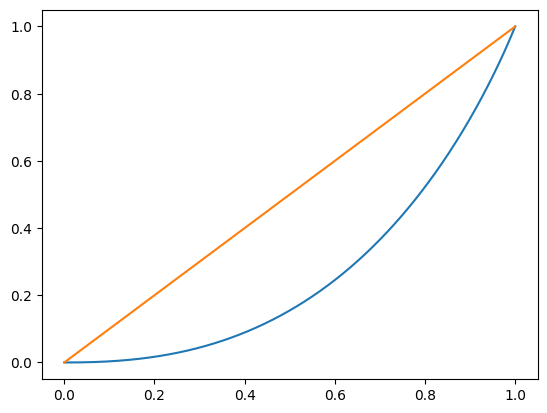

In [90]:
# PRED * WEIGHT(ECM)
# ensure your arr is sorted from lowest to highest values first!
scores = score_state(state = 'All', file_path = 'UMB_Tar_holdout_data_pooldigit_1011')
arr = gini_curve(data = scores, pred = 'UMB_Tar_Loss', obs = 'UMB_Loss', weight = 'UMB_ECM')

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

In [18]:
count = arr.size
print(count)

6577721


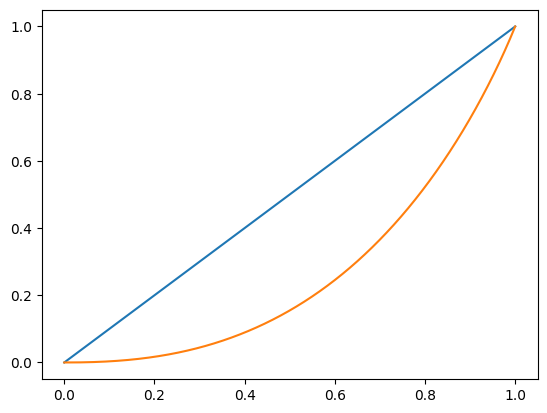

In [91]:
# !pip install xlsxwriter
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
import io

# show the gini index!
coef = (gini(arr))

mean = np.linspace(0.0, 1.0, lorenz(arr).size)
lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
fig,ax = plt.subplots()
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], mean, lorenz_curve)
# ax.show()

# x=np.linspace(-10,10,100)
# y=x**2

# fig,ax=plt.subplots()
# ax.plot(x,y)

workbook = xlsxwriter.Workbook('Gini_curve_Blend_30%.xlsx')
wks1=workbook.add_worksheet('HO_5')
wks1.write(0,0,'Gini coef')
wks1.write(0,2,gini(arr))

imgdata=io.BytesIO()
fig.savefig(imgdata, format='png')
wks1.insert_image(2,2, '', {'image_data': imgdata})

workbook.close()

### Q-Q PLOT

In [99]:
# run each time program is opened

def qq_plot(data, pred, obs, weight):
    # This function creates the lift chart using auto's method of normaling by state and year
    
    df = pd.DataFrame({'p': data[pred], 'a': data[obs], 'w': data[weight]})
    df["pw"] = df.p * df.w
    df["aw"] = df.a * 1
    
    # df["res"] = df.pw - df.aw
    a_mean = df['aw'].mean()
    a_std = df['aw'].std()
    print(a_mean)
    df['res_norm'] = (df['pw']-a_mean)/a_std
    
#     order = df.w[df.res_norm.argsort()].cumsum()
#     percentile = order / order.iloc[-1]
#     percentile = percentile.dropna()
#     df['bin'] = pd.cut(x = percentile, bins = bins, labels = False, duplicates = 'drop').sort_index()

#     g = df.groupby('bin')
#     g_bin = g[['rpw', 'aw', 'w']].sum().reset_index()
#     g_bin['records'] = g.size()

#     g_bin['pred'] = (g_bin.rpw / g_bin.w) / (g_bin.rpw.sum() / g_bin.w.sum())
#     g_bin['act'] = (g_bin.aw / g_bin.w) / (g_bin.aw.sum() / g_bin.w.sum())

#     g_bin['bin_pct'] = g_bin.w / g_bin.w.sum()

#     g_bin = g_bin[['pred', 'act', 'bin_pct', 'w']]

#     pd.set_option('display.max_rows', None)
#     results = pd.DataFrame({'pred': g_bin['pred'], 'act': g_bin['act'], 'Weight': g_bin['w'], 'bin_pct': g_bin['bin_pct']})
    
    
    return df['res_norm']

In [100]:
scores = score_state(state = 'All', file_path = 'UMB_Tar_holdout_data_pooldigit_1011')
qq = qq_plot(data = scores, pred = 'UMB_Tar_Loss', obs = 'UMB_Loss', weight = 'UMB_ECM')
# print(qq)

5.703754131053396


In [107]:
print(scores)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOStream.flush timed out


In [108]:
scores.to_csv('Scores.csv', index = False, header=True)

In [104]:
res_mean = qq.mean()
res_std = qq.std()
print(res_mean)
print(res_std)

-0.004262907403887524
0.0012878739948746177


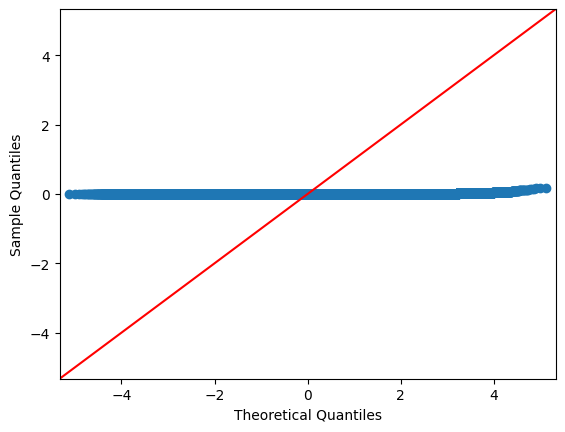

In [113]:
# !pip install statsmodels==0.12.2
import numpy as np 
import statsmodels.api as sm 
import pylab as py

data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(qq, line ='45') 
py.show()

<Axes: >

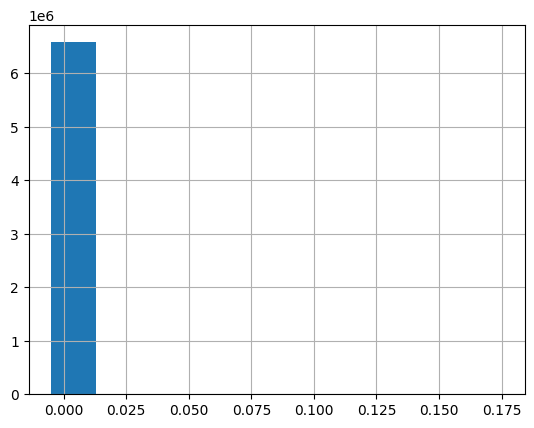

In [106]:
qq.hist()

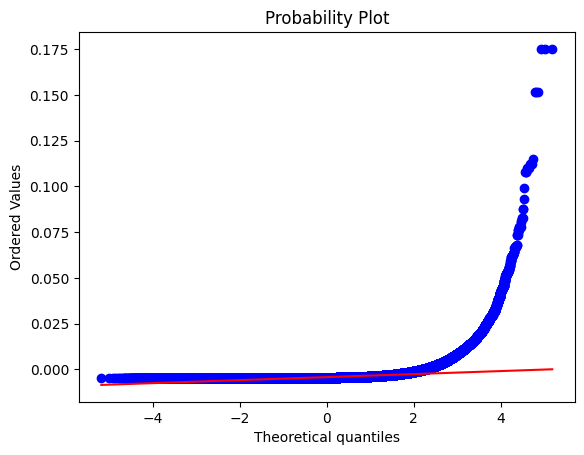

In [98]:
import pylab
import scipy.stats as stats

stats.probplot(qq, dist="norm", plot = pylab)
pylab.show()

In [112]:
# importing packages 
import scipy.stats 
  
# finding p-value 
p_value = scipy.stats.norm.sf(abs(28040.21555))*2
print('p value is : ' + str(p_value))

p value is : 0.0


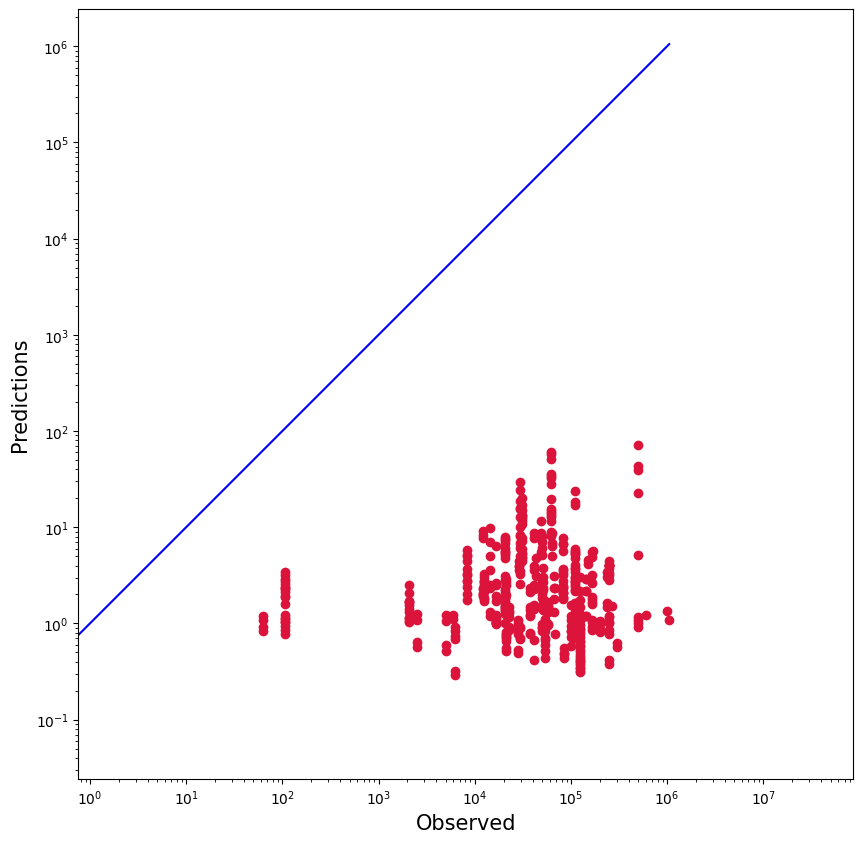

In [119]:
# observed versus predicted
predicted_value = scores['UMB_Tar_Loss']
obs_value  = scores['UMB_Loss']

plt.figure(figsize=(10,10))
plt.scatter(obs_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(obs_value))
p2 = min(min(predicted_value), min(obs_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [124]:
import seaborn as sns
plt.figure(figsize=(10000000,10000000))
sns.residplot(scores['UMB_Loss'], scores['UMB_Tar_Loss'])
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

Error in callback <function _draw_all_if_interactive at 0x7f19e873c180> (for post_execute):


ValueError: Image size of 1000000000x1000000000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1e+09x1e+09 with 0 Axes>